<a href="https://colab.research.google.com/github/hrcn81/commonplace/blob/main/surplus/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/hrcn81/commonplace/main/Datasets/Crop_recommendation.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df = df[['temperature','ph']]

In [6]:
df.head()

,temperature,ph
0,20.879744,6.502985
1,21.770462,7.038096
2,23.004459,7.840207
3,26.491096,6.980401
4,20.130175,7.628473


In [7]:
df.shape

(2200, 2)

In [8]:
df.isna().sum()

temperature    0
ph             0
dtype: int64

In [9]:
df.columns

Index(['temperature', 'ph'], dtype='object')

In [10]:
df.shape

(2200, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   ph           2200 non-null   float64
dtypes: float64(2)
memory usage: 34.5 KB


In [12]:
df.describe().round()

,temperature,ph
count,2200.0,2200.0
mean,26.0,6.0
std,5.0,1.0
min,9.0,4.0
25%,23.0,6.0
50%,26.0,6.0
75%,29.0,7.0
max,44.0,10.0


In [13]:
x = df.iloc[:,0:1]

x.head()

,temperature
0,20.879744
1,21.770462
2,23.004459
3,26.491096
4,20.130175


In [14]:
y = df.iloc[:,1:]

y.head()

,ph
0,6.502985
1,7.038096
2,7.840207
3,6.980401
4,7.628473


In [15]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 43)

In [16]:
xtrain.shape

(1760, 1)

In [17]:
xtest.shape

(440, 1)

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xtrain,ytrain)

LinearRegression()

In [19]:
lr.coef_

array([[-0.00339954]])

In [20]:
lr.intercept_

array([6.56195255])

In [21]:
lr.intercept_ = float(lr.intercept_[0])
lr.intercept_

6.561952549790794

In [22]:
lr.coef_ = float(lr.coef_[0])

lr.coef_

<ipython-input-22-65fa6a1cb387>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lr.coef_ = float(lr.coef_[0])


-0.0033995390291464353

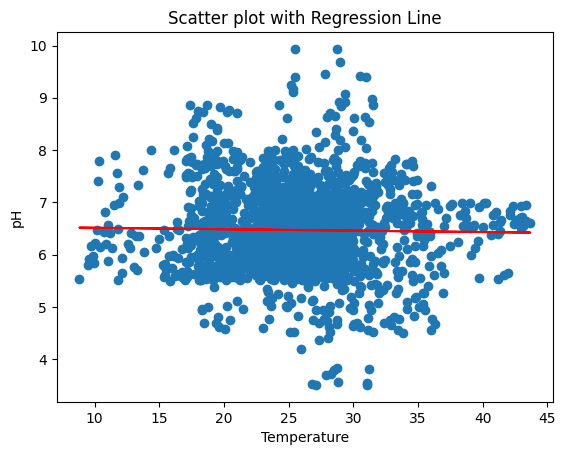

In [23]:
import matplotlib.pyplot as plt

x = df['temperature'].values.reshape(-1, 1)
y = df['ph'].values

lr = LinearRegression()
lr.fit(x, y)

plt.scatter(x, y)

plt.plot(x, lr.predict(x), color='red')

plt.xlabel('Temperature')
plt.ylabel('pH')
plt.title('Scatter plot with Regression Line')
plt.show()

In [24]:
m = lr.intercept_

m

6.539150371259624

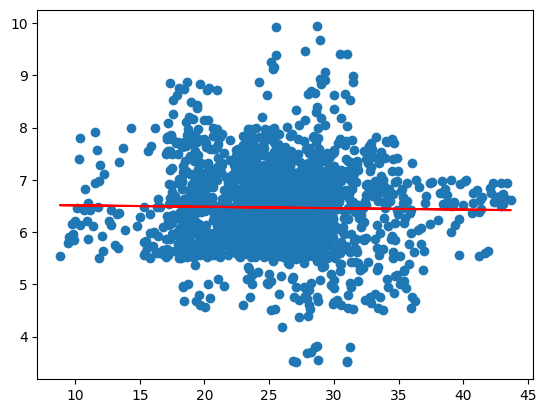

In [25]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color = 'red')

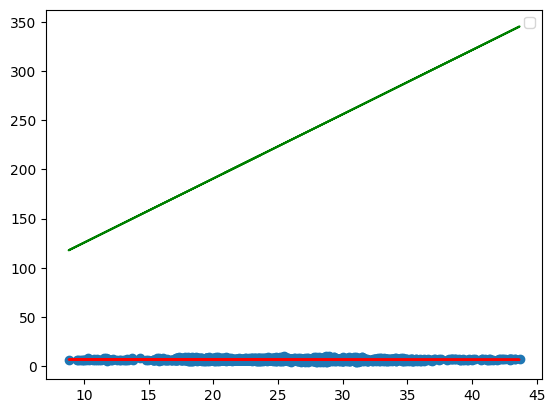

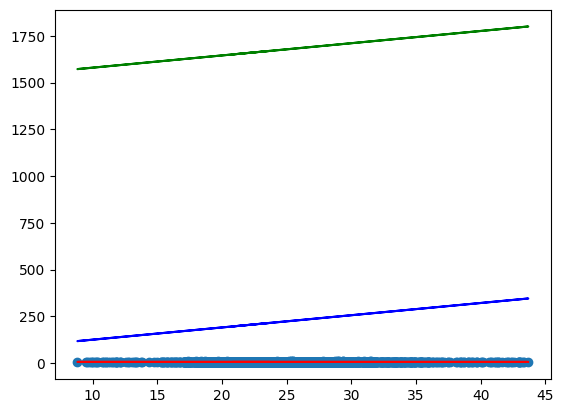

In [26]:
ypred = m*x + 60

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color = 'red')
plt.plot(x,ypred,color = 'green')
plt.legend()
plt.show()
print()

b = -200
loss_slop = -2*np.sum(y - m*x.ravel() - b)

learning_rate = 0.01
step_size = loss_slop*learning_rate

b = b - step_size

ypred1 = (m*x + b)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color = 'red')
plt.plot(x,ypred1,color = 'green')
plt.plot(x,ypred,color = 'blue')
plt.show()

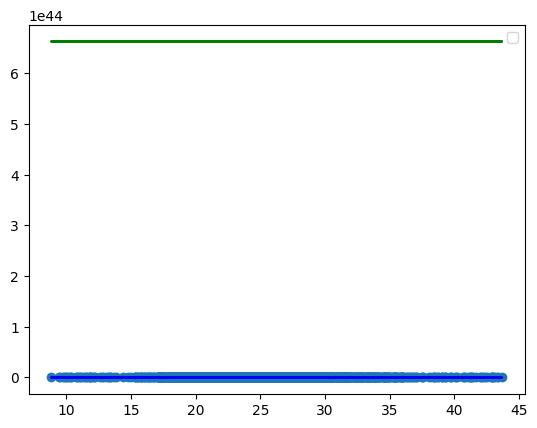


new_b =  6.631223383070142e+44


In [27]:

def intercept(x, y, m, b, learning_rate, iterations=1):
    for i in range(iterations):
        loss_slope = -2 * np.sum(y - m*x.ravel() - b)
        step_size = loss_slope * learning_rate
        b = b - step_size
    return b

b = 40
learning_rate = 0.001
iterations = 80

new_b = intercept(x, y, m, b, learning_rate, iterations)

ypred1 = ((m*x) + new_b)

plt.scatter(x, y)
plt.plot(x, lr.predict(x), color='red')
plt.plot(x, ypred, color='blue')
plt.plot(x, ypred1, color='green')
plt.legend()
plt.show()
print('\nnew_b = ',new_b)

6.539150371259624